<a href="https://colab.research.google.com/github/situ-sedatu/taller_situ/blob/main/resultados_taller_situ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procesamiento de datos de taller SITU

In [ ]:
#Borrar los datos del entorno
rm(list=ls())

#Paquetería

#Se utiliza pacman para instalar y cargar paquetes
if(!require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse,googledrive,janitor,cellranger, stopwords,tidytext,
               showtext,openxlsx,ggwordcloud)
#Fuente para los gráficos
font_add_google("Poppins", "pop")
showtext_auto()
paleta<-c("#9f2241","#235b4e","#bc955c","#98989a", "orange","violet")

Loading required package: pacman

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pacman’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’



janitor installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘ISOcodes’



stopwords installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SnowballC’, ‘janeaustenr’, ‘tokenizers’



tidytext installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sysfonts’, ‘showtextdb’



showtext installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


openxlsx installe

In [ ]:
  #Conectar a google drive
drive_auth(email = "claudiodanielpc@gmail.com",cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=27e64e2ccccfb65dc7d1bf5ebcbbe240&login_hint=claudiodanielpc%40gmail.com&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWVhblMwYVpid3VrZV9TMDRGOWR0VmduRkoyRTY1bmdjYlV6N21qRy1vX2U5b3hWUlAtQldSUUpkNDU0OWstY2hRNzF0ZyIsInN0YXRlIjoiMjdlNjRlMmNjY2NmYjY1ZGM3ZDFiZjVlYmNiYmUyNDAifQ==


In [ ]:
leer_todas_las_hojas <- function(id_archivo) {
  # Descarga el archivo a una ubicación local temporal
  archivo_local <- tempfile()
  drive_download(id_archivo, archivo_local)



  # Obtener nombres de las hojas
  hojas <- readxl::excel_sheets(archivo_local)

  # Leer cada hoja y añadir el nombre de la hoja
  datos <- map_dfr(hojas, ~ {
    datos_hoja <- readxl::read_excel(archivo_local, sheet = .x,
        range = cellranger::cell_limits(c(3, 1), c(NA, 24)), # A3:X, where 24 is the 24th column (X)
    col_names = TRUE,



    ) %>%
      slice(-1) %>%
      janitor::clean_names()%>%
      select(-c(14, 20)) %>% # Eliminar columnas 14 y 19
      mutate(hoja = .x) # Añadir columna con el nombre de la hoja
    datos_hoja
  })



  unlink(archivo_local)

  # Devuelve el dataframe combinado
  return(datos)
}


In [ ]:
carpeta<-as_id(drive_get("https://drive.google.com/drive/folders/1djksyl5Af-SPs4xb2nY6vRLjO0XBPPfl"))
archivos<-drive_ls(carpeta)
print(archivos)

# A dribble: 2 × 3
  name                              id       drive_resource   
  <chr>                             <drv_id> <list>           
1 AreasEstrategicaConsumoProdu.xlsx 1aBETkK… <named list [39]>
2 TALLER PARTICIPATIVO.docx         1i9qT-N… <named list [41]>


In [ ]:
iddata <- archivos$id[1]
consolidado <- leer_todas_las_hojas(iddata)%>%
  filter(hoja=="SDUV" | hoja=="RAN" | hoja=="SOTA" | hoja=="DGIMRC" | hoja=="DGOPR" |hoja=="UPDI" |hoja=="DGCAM" | hoja=="DGDUSV")

File downloaded:

• AreasEstrategicaConsumoProdu.xlsx <id: 1aBETkKsxZ8hcZxRqLhQr8ytYt1X4ujqW>

Saved locally as:

• /tmp/RtmpwGoS5O/file10f1501c0a6

New names:
• `` -> `...14`
• `` -> `...20`
New names:
• `` -> `...14`
• `` -> `...20`
New names:
• `` -> `...14`
• `` -> `...20`
New names:
• `` -> `...14`
• `` -> `...20`
New names:
• `` -> `...14`
• `` -> `...20`
New names:
• `` -> `...14`
• `` -> `...20`
New names:
• `` -> `...14`
• `` -> `...20`
New names:
• `` -> `...14`
• `` -> `...20`
New names:
• `` -> `...14`
• `` -> `...20`
New names:
• `` -> `...14`
• `` -> `...20`
New names:
• `` -> `...14`
• `` -> `...20`
New names:
• `` -> `...14`
• `` -> `...20`
New names:
• `` -> `...14`
• `` -> `...20`
New names:
• `` -> `...14`
• `` -> `...20`
New names:
• `` -> `...14`
• `` -> `...20`
New names:
• `` -> `...14`
• `` -> `...20`
New names:
• `` -> `...14`
• `` -> `...20`
New names:
• `` -> `...14`
• `` -> `...20`
New names:
• `` -> `...14`
• `` -> `...20`
New names:
• `` -> `...14`
• `` ->

In [ ]:
str(consolidado)

tibble [56 × 23] (S3: tbl_df/tbl/data.frame)
 $ id                                 : num [1:56] 76 78 90 79 89 NA 83 81 80 82 ...
 $ area                               : chr [1:56] "Subsecretaría de Desarrollo Urbano y Vivienda" "Subsecretaría de Desarrollo Urbano y Vivienda" "Subsecretaría de Desarrollo Urbano y Vivienda" "Subsecretaría de Desarrollo Urbano y Vivienda" ...
 $ subarea                            : chr [1:56] "Dirección de Coordinación y Seguimiento Interinstitucional" "Dirección de Planeación" "Dirección de Planeación" "Dirección de Coordinación y Seguimiento Interinstitucional" ...
 $ que_hace_en_general                : chr [1:56] "Coordina políticas y programas para el desarrollo urbano y ordenamiento de asentamientos humanos." "Elabora estrategias y lineamientos para el ordenamiento territorial." "Elabora estrategias y lineamientos para el ordenamiento territorial." "Promueve la coordinación metropolitana para la implementación de estrategias de desarrollo." ...
 $ 

In [ ]:
print(paste0("Areas\n",unique(consolidado$hoja)))
print(length(consolidado))

[1] "Areas\nSDUV"   "Areas\nDGDUSV" "Areas\nSOTA"   "Areas\nDGCAM" 
[5] "Areas\nDGIMRC" "Areas\nDGOPR"  "Areas\nRAN"    "Areas\nUPDI"  
[1] 23


**Resultados**

In [ ]:
infoproduce <- consolidado %>%
  select(11:13) %>%
  pivot_longer(
    cols = everything(),
    names_to = "tipo_info",
    values_to = "valor"
  ) %>%
  mutate(valor = tolower(valor)) %>%
  mutate(valor = case_when(
    valor == "x" ~ "1",
    TRUE ~ valor
  )) %>%
  mutate(valor = as.numeric(valor))%>%
  group_by(tipo_info)%>%
  summarise(valor=sum(valor,na.rm = TRUE))%>%
  ungroup()%>%
  mutate(pct=valor/sum(valor)*100)%>%
  mutate(tipo_info=case_when(tipo_info=="estrategica" ~ "Estratégica",
tipo_info=="operacional" ~ "Operacional",
tipo_info=="tactica" ~ "Táctica"))%>%
  mutate(uso_info="Produce")




infoproduce

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `valor = as.numeric(valor)`.
Caused by warning:
! NAs introduced by coercion”


tipo_info,valor,pct,uso_info
<chr>,<dbl>,<dbl>,<chr>
Estratégica,7,24.13793,Produce
Operacional,17,58.62069,Produce
Táctica,5,17.24138,Produce


In [ ]:
#Tabla produce info

infousocot <- consolidado %>%
  select(14:18) %>%
  pivot_longer(
    cols = everything(),
    names_to = "tipo_info",
    values_to = "valor"
  ) %>%
  mutate(valor = tolower(valor)) %>%
  mutate(valor = case_when(
    valor == "x" ~ "1",
    TRUE ~ valor
  )) %>%
  mutate(valor = as.numeric(valor))%>%
  group_by(tipo_info)%>%
  summarise(valor=sum(valor,na.rm = TRUE))%>%
  ungroup()%>%
  mutate(pct=valor/sum(valor)*100)%>%
    mutate(tipo_info=case_when(tipo_info=="almacenamiento" ~ "Almacenamiento",
tipo_info=="creacion" ~ "Creación",
tipo_info=="distribucion" ~ "Distribución",
tipo_info=="eliminacion" ~ "Eliminación",
tipo_info=="uso" ~ "Uso"))%>%
  mutate(uso_info="Ciclo")



infousocot

tipo_info,valor,pct,uso_info
<chr>,<dbl>,<dbl>,<chr>
Almacenamiento,11,20.000000,Ciclo
Creación,17,30.909091,Ciclo
Distribución,11,20.000000,Ciclo
Eliminación,2,3.636364,Ciclo
Uso,14,25.454545,Ciclo


In [ ]:
#Pegar tablas
consumo_uso<-rbind(infoproduce,infousocot)
consumo_uso

tipo_info,valor,pct,uso_info
<chr>,<dbl>,<dbl>,<chr>
Estratégica,7,24.137931,Produce
Operacional,17,58.620690,Produce
Táctica,5,17.241379,Produce
Almacenamiento,11,20.000000,Ciclo
Creación,17,30.909091,Ciclo
Distribución,11,20.000000,Ciclo
Eliminación,2,3.636364,Ciclo
Uso,14,25.454545,Ciclo


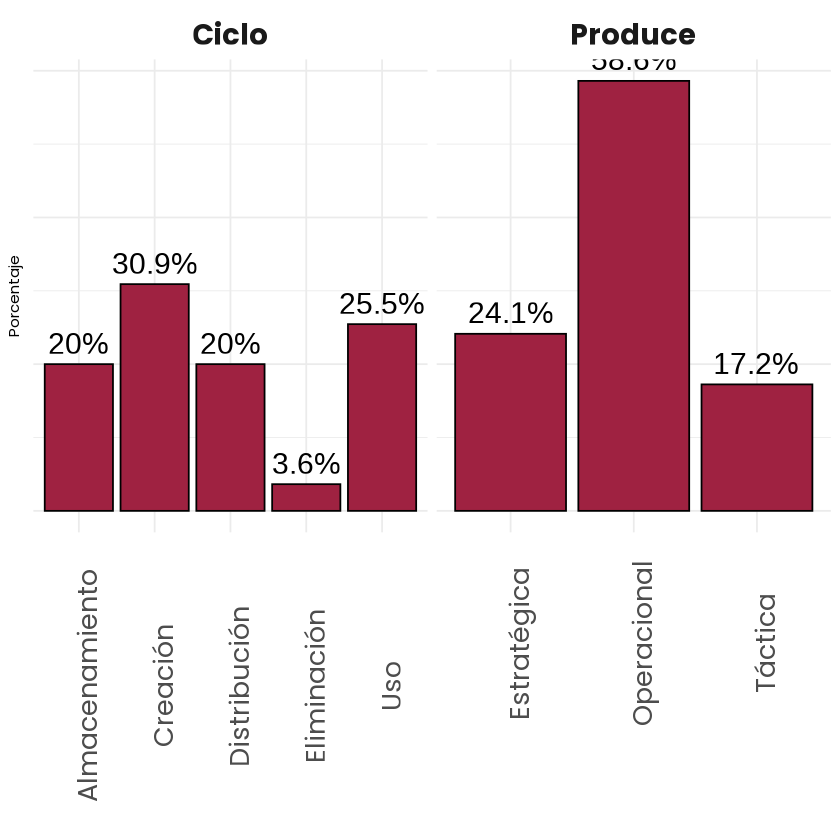

In [ ]:
consumo_uso%>%
  ggplot(aes(x=tipo_info,y=pct))+
geom_bar(stat="identity",color="black",fill=paleta[1])+
    geom_text(aes(label = paste0(round(pct, 1), "%")),
                hjust = 0.5, vjust=-0.5, size = 8)+
                  theme_minimal()+
facet_wrap(~uso_info,scales = "free_x")+
labs(y="Porcentaje")+
theme(legend.position="bottom",
text=element_text(family="pop"),
    axis.text.y = element_blank(),
    strip.text = element_text(size = 22, face = "bold"),
    axis.text.x = element_text(size=20, angle = 90),
                  plot.title = element_text(size=40,face="bold"),
                    plot.subtitle = element_text(size=30,face="italic"),
    axis.title.x = element_blank(),
plot.caption = element_text(size=12,hjust=0),
legend.title=element_text(size=20),
legend.text=element_text(size=20)
)

ggsave("uso_ciclo_info2.png",width=20,height=10,dpi=100, bg="white")



In [ ]:
#Info consume y produce
spanish_stopwords<-stopwords("es")


In [ ]:
info_consume <- consolidado$que_informacion_consume_actualmente %>%
  replace_na("") %>%               # nans con string vacío
  tibble(text = .) %>%             # tibble
 unnest_tokens(word, text, token = "words") %>%
 filter(word != "") %>%
  anti_join(get_stopwords(language = "es"), by = "word") %>%  # Volar stopwords
  count(word, sort = TRUE)

info_consume

word,n
<chr>,<int>
información,9
datos,4
proyectos,4
social,4
suelo,4
acuerdos,3
documentos,3
inegi,3
territoriales,3


In [ ]:
info_produce <- consolidado$que_informacion_produce_actualmente %>%
  replace_na("") %>%
  tibble(text = .) %>%
  unnest_tokens(word, text, token = "words") %>%
  filter(word != "") %>%
  anti_join(get_stopwords(language = "es"), by = "word") %>%
  count(word, sort = TRUE)
info_produce

word,n
<chr>,<int>
reportes,6
información,5
seguimiento,4
territoriales,4
datos,3
documentos,3
gestión,3
informes,3
proyectos,3


Warning message in wordcloud_boxes(data_points = points_valid_first, boxes = boxes, :
“Some words could not fit on page. They have been placed at their original positions.”


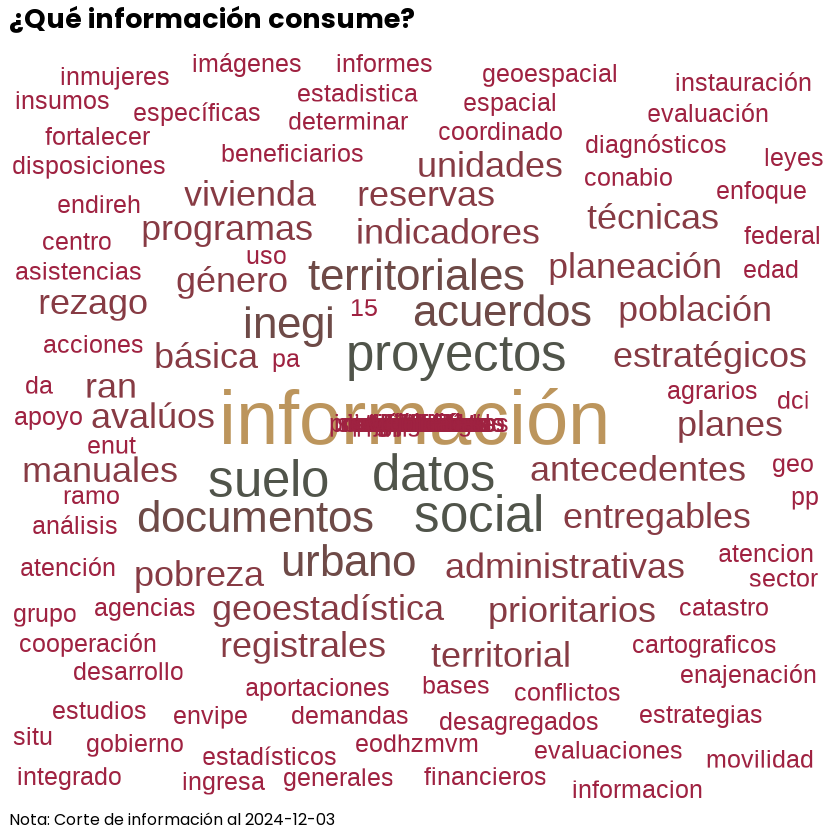

In [ ]:
info_consume%>%
ggplot(aes(label=word,size=n, color=n))+
geom_text_wordcloud(shape = "circle")+
  scale_size_area(max_size = 20) +
  scale_color_gradientn(colours = paleta[1:3])+
theme_minimal()+

labs(title="¿Qué información consume?",
     caption=paste0("Nota: Corte de información al ",Sys.Date()))+
theme(text=element_text(family="pop"),
      plot.title = element_text(size=20,face="bold"),
      plot.caption = element_text(size=12,hjust=0),
      plot.subtitle = element_text(size=15,face="italic"),
      legend.position="none")

ggsave("info_consume_taller2.png",width=20,height=10,dpi=100, bg="white")


Warning message in wordcloud_boxes(data_points = points_valid_first, boxes = boxes, :
“Some words could not fit on page. They have been placed at their original positions.”


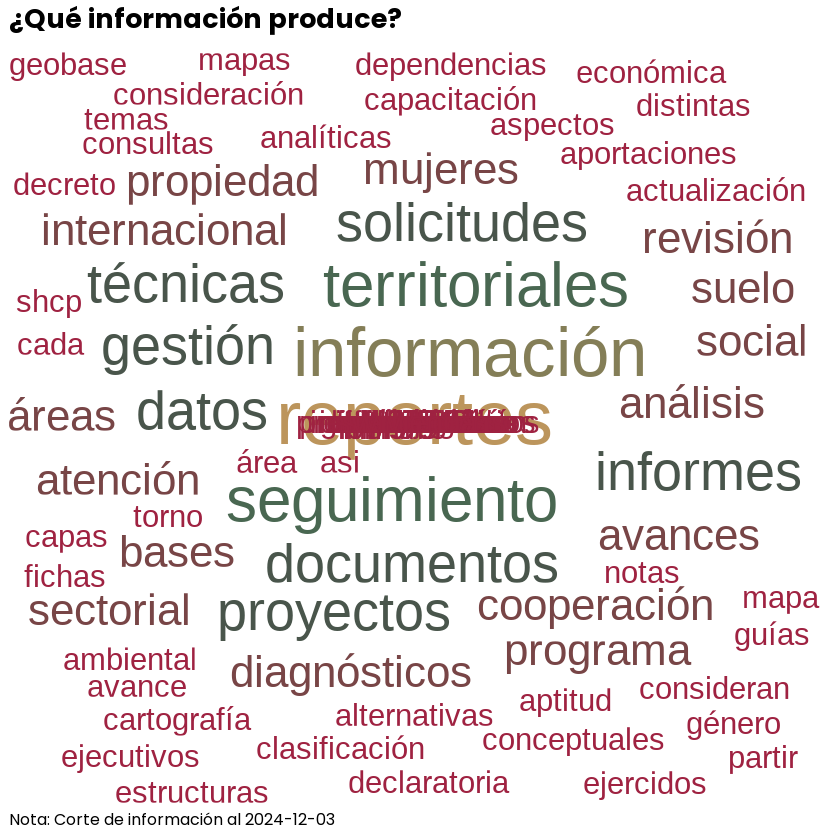

In [ ]:
info_produce%>%
ggplot(aes(label=word,size=n, color=n))+
geom_text_wordcloud(shape = "circle")+
  scale_size_area(max_size = 20) +
  scale_color_gradientn(colours = paleta[1:3])+
theme_minimal()+

labs(title="¿Qué información produce?",
     caption=paste0("Nota: Corte de información al ",Sys.Date()))+
theme(text=element_text(family="pop"),
      plot.title = element_text(size=20,face="bold"),
      plot.caption = element_text(size=12,hjust=0),
      plot.subtitle = element_text(size=15,face="italic"),
      legend.position="none")
ggsave("info_producetaller2.png",width=20,height=10,dpi=100, bg="white")
